In [56]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import json,urllib.request
import csv 
import pandas as pd
import requests
import geopandas as gpd
import geojson
import tweepy
import datetime
from fastai.text import *
import pydeck as pdk
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px

In [3]:
PM252016_dat = pd.read_csv('2016_EmissioNS_PM215_T.csv')
convert_dict = {'STW': float, 
                'Gas Leakage': float,
                'Forestry' : float                
               } 
PM252016_dat = PM252016_dat.astype(convert_dict) 
PM252016_dat.dtypes
PM252016_dat.describe

PM252016_sel = PM252016_dat[['Source','Domestic','Transport']]

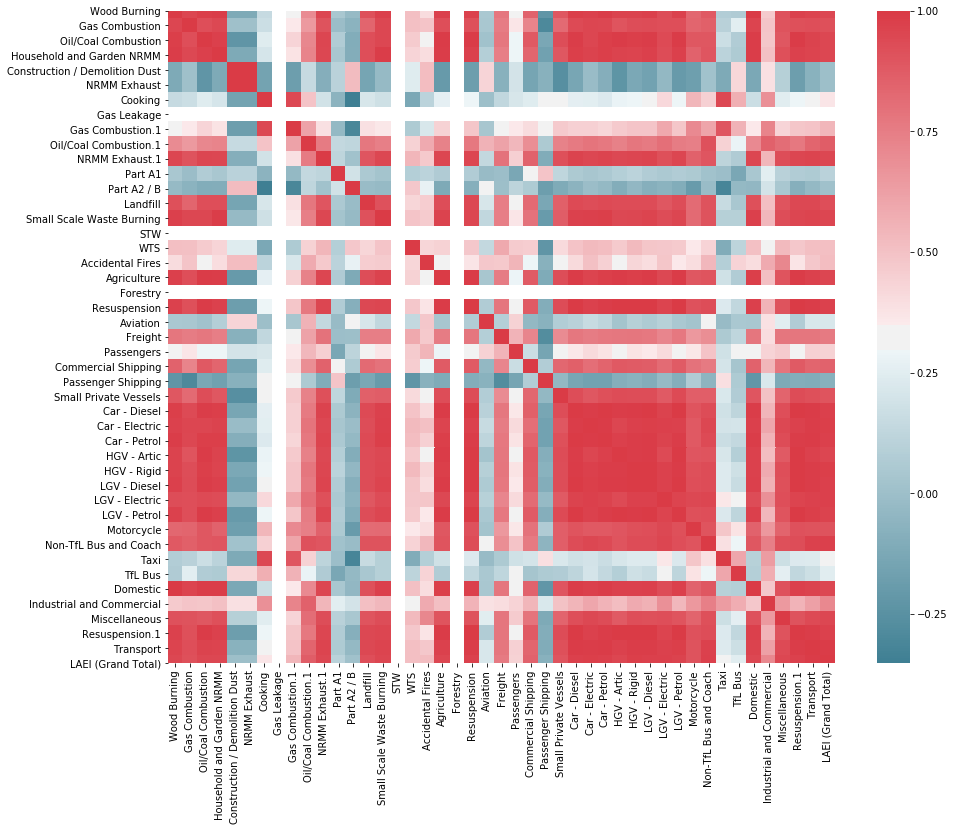

In [4]:
import seaborn as sns


f, ax = plt.subplots(figsize=(15, 12))
corr = PM252016_dat.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [22]:
PM252016_dat1 = PM252016_dat[['Domestic','Industrial and Commercial','Miscellaneous','Resuspension.1','Transport','LAEI (Grand Total)']]
PM252016_dat1.describe()

# corrMatrix = PM252016_dat1.corr()
#plt.figure(figsize = (20,20))
# plt.figure()
#sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 20})
# sn.heatmap(corrMatrix, annot=True)

corr = PM252016_dat1.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True)).set_precision(2)

,Domestic,Industrial and Commercial,Miscellaneous,Resuspension.1,Transport,LAEI (Grand Total)
Domestic,1.00,0.48,0.91,0.98,0.96,0.95
Industrial and Commercial,0.48,1.00,0.65,0.55,0.62,0.71
Miscellaneous,0.91,0.65,1.00,0.91,0.94,0.95
Resuspension.1,0.98,0.55,0.91,1.00,0.99,0.97
Transport,0.96,0.62,0.94,0.99,1.00,0.99
LAEI (Grand Total),0.95,0.71,0.95,0.97,0.99,1.00


In [28]:
PM252016_raw = pd.read_csv('2016_EmissioNS_PM215_T.csv')
PM252016_raw[['Source','Domestic','Industrial and Commercial','Miscellaneous','Resuspension.1','Transport','LAEI (Grand Total)']]

,Source,Domestic,Industrial and Commercial,Miscellaneous,Resuspension.1,Transport,LAEI (Grand Total)
0,Barking.and.Dagenham,26.001926,48.578391,2.187341,0.928622,26.781761,104.478041
1,Barnet,39.653024,72.966003,2.854134,2.199133,70.946879,188.619173
2,Bexley,35.043740,68.653259,2.758467,1.102179,36.100436,143.658081
3,Brent,27.546336,44.172240,3.046184,1.205819,41.812351,117.782930
4,Bromley,44.215846,59.510919,5.335442,1.324599,49.936000,160.322807
5,Camden,9.097339,60.313497,1.675365,0.807878,29.237873,101.131952
6,City,0.066876,32.669808,0.348869,0.306337,11.813479,45.205369
7,City.of.Westminster,8.699728,140.991704,2.830398,1.360210,49.596791,203.478831
8,Croydon,46.013552,43.068722,3.235155,1.311671,45.055498,138.684598
9,Ealing,35.819741,53.563073,4.238252,1.664536,66.378422,161.664023


## Functions

In [48]:
# This code comes from the module of Quantitative Methods (CASA0007), and is prepared by Dr Thomas Evans

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
   #         print("col_selected:"+new_column)
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
#             print(worst_feature)            
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(included[worst_feature], worst_pval))
            included.remove(included[worst_feature])
        if not changed:
            break
    return included

## Emissions data analysis

In [20]:
# separate the independent and dependent variables
predictors_PM252016_dat = PM252016_dat.drop(columns=['Source','Gas Leakage','LAEI (Grand Total)'], axis=1)
response_PM252016_dat = PM252016_dat[['LAEI (Grand Total)']]

X = predictors_PM252016_dat.values
y = response_PM252016_dat.values

# the name list of independent variables
list_var_X = predictors_PM252016_dat.columns.tolist()
# list_var_X.remove('MEDV')

In [21]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_PM252016_dat, y=response_PM252016_dat)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning:

invalid value encountered in true_divide

C:\Softwares\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

C:\Softwares\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

C:\Softwares\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



Add  Transport                      with p-value 3.69373e-29
Add  Industrial and Commercial      with p-value 9.53077e-11
Add  Domestic                       with p-value 1.79111e-36
Add  Miscellaneous                  with p-value 2.46013e-06
Add  Resuspension                   with p-value 3.9099e-167
Add  Resuspension.1                 with p-value 3.9099e-167
The predictors that are selected by stepwise regression are:
['Transport', 'Industrial and Commercial', 'Domestic', 'Miscellaneous', 'Resuspension', 'Resuspension.1']


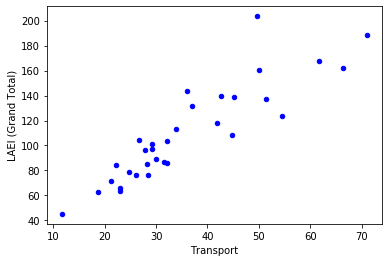

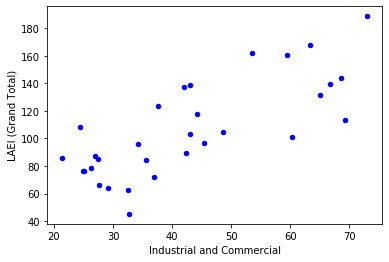

In [33]:

PM252016_dat[PM252016_dat['Transport'] <= 100].plot.scatter(x='Transport',y='LAEI (Grand Total)',c='Blue')
PM252016_dat[PM252016_dat['Industrial and Commercial'] <= 110].plot.scatter(x='Industrial and Commercial',y='LAEI (Grand Total)',c='Blue')


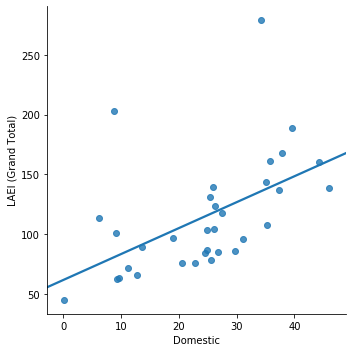

In [18]:
 sn.lmplot(x='Domestic', y='LAEI (Grand Total)', data=PM252016_dat[PM252016_dat['Domestic'] <= 55], ci=None)
# sn.lmplot(x='Domestic', y='LAEI (Grand Total)', data=PM252016_dat, ci=None)

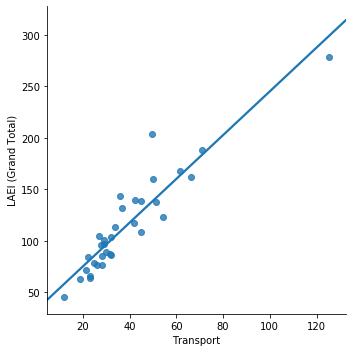

In [21]:
# PM252016_dat[PM252016_dat['Transport'] <= 100].plot.scatter(x='Transport',y='LAEI (Grand Total)',c='Blue')
sn.lmplot(x='Transport', y='LAEI (Grand Total)', data=PM252016_dat[PM252016_dat['Transport'] <= 200], ci=None)

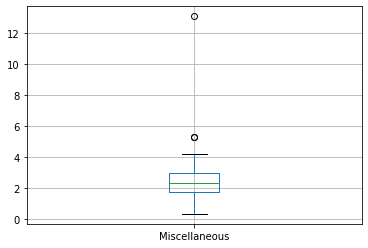

In [34]:
boxplot = PM252016_dat.boxplot(column=['Miscellaneous'])
                               
#, 'Domestic', 'Miscellaneous', 'Resuspension', 'Resuspension.1'])

In [57]:
#import plotly.express as px
#df = px.data.tips()
fig = px.box( PM252016_dat, y="Domestic",points="all")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'LSOA11CD', 'LSOA11NM', 'Hectares', 'TransEm', 'DomEm', 'TotEm'] but received: Domestic

In [49]:
PM252016_dat[:-1]

,Source,Wood Burning,Gas Combustion,Oil/Coal Combustion,Household and Garden NRMM,Construction / Demolition Dust,NRMM Exhaust,Cooking,Gas Leakage,Gas Combustion.1,...,Motorcycle,Non-TfL Bus and Coach,Taxi,TfL Bus,Domestic,Industrial and Commercial,Miscellaneous,Resuspension.1,Transport,LAEI (Grand Total)
0,Barking.and.Dagenham,20.838703,2.843047,2.297172,0.023005,9.259987,13.098051,3.932762,0.0,0.691708,...,0.139159,0.305899,0.364374,1.364975,26.001926,48.578391,2.187341,0.928622,26.781761,104.478041
1,Barnet,28.939930,8.413604,2.226054,0.073436,18.304462,25.891265,12.034601,0.0,1.357391,...,0.498268,1.307137,2.203679,3.306512,39.653024,72.966003,2.854134,2.199133,70.946879,188.619173
2,Bexley,27.527271,4.752825,2.718339,0.045305,10.420257,14.739227,6.970103,0.0,0.800169,...,0.243566,0.700065,0.532355,1.703107,35.043740,68.653259,2.758467,1.102179,36.100436,143.658081
3,Brent,19.977017,5.950456,1.593287,0.025577,6.313223,8.929917,10.671760,0.0,1.356926,...,0.287694,0.615410,1.641642,2.595594,27.546336,44.172240,3.046184,1.205819,41.812351,117.782930
4,Bromley,33.212044,7.858801,3.018082,0.126920,13.241110,18.729263,10.984617,0.0,0.953285,...,0.363824,0.832477,0.685246,2.514181,44.215846,59.510919,5.335442,1.324599,49.936000,160.322807
5,Camden,4.813491,3.669979,0.606223,0.007645,3.745891,5.298481,42.197254,0.0,3.714520,...,0.425559,0.547065,3.841725,2.554031,9.097339,60.313497,1.675365,0.807878,29.237873,101.131952
6,City,0.013227,0.051272,0.002362,0.000015,1.229561,1.739187,24.268965,0.0,1.954774,...,0.224622,0.381163,2.968451,1.073831,0.066876,32.669808,0.348869,0.306337,11.813479,45.205369
7,City.of.Westminster,4.386812,3.678568,0.632400,0.001948,8.010010,11.329985,95.955871,0.0,6.301241,...,0.776362,1.945467,12.448214,4.594264,8.699728,140.991704,2.830398,1.360210,49.596791,203.478831
8,Croydon,34.344686,7.885972,3.696239,0.086655,8.340345,11.797237,10.681531,0.0,1.199677,...,0.322859,0.828699,0.649370,2.860478,46.013552,43.068722,3.235155,1.311671,45.055498,138.684598
9,Ealing,26.868059,6.402114,2.524937,0.024631,8.910272,12.603387,11.050723,0.0,1.768258,...,0.436414,1.009891,1.447253,3.036582,35.819741,53.563073,4.238252,1.664536,66.378422,161.664023


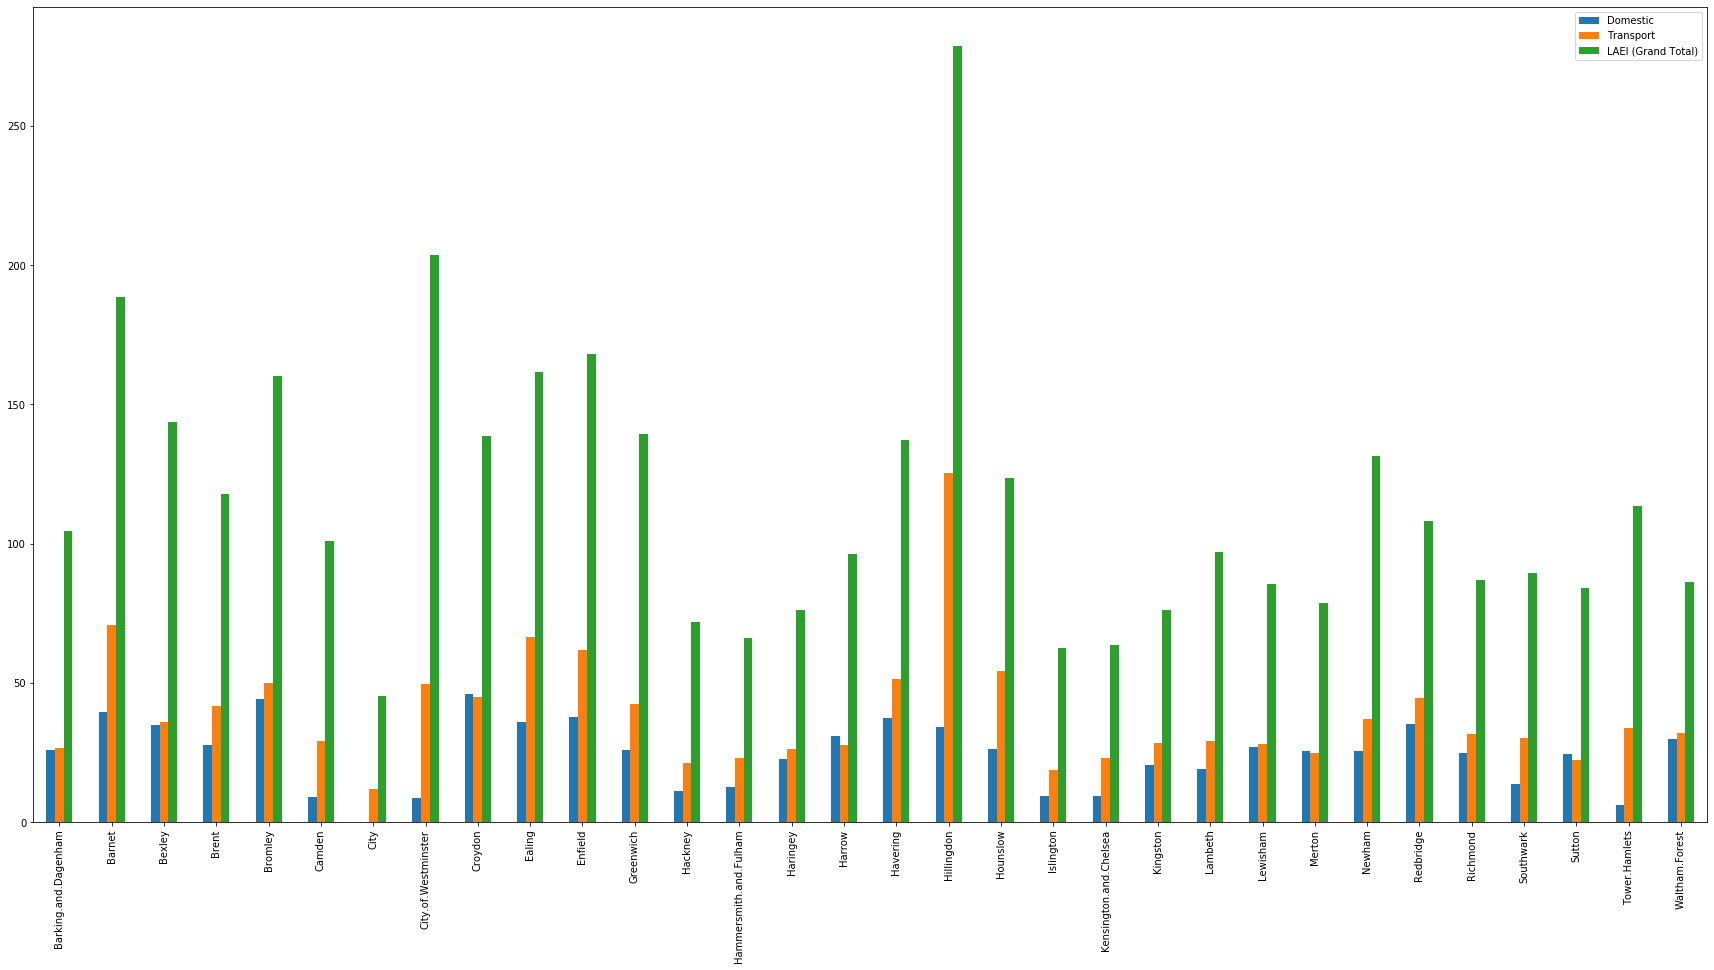

In [52]:
PM252016_df = PM252016_dat[:-1]
index = PM252016_df['Source'].values
df_temp = pd.DataFrame({'Domestic':PM252016_df['Domestic'].values,
                        'Transport':PM252016_df['Transport'].values,
                        'LAEI (Grand Total)':PM252016_df['LAEI (Grand Total)'].values
                       },
                       index=index)

ax =df_temp.plot.bar(figsize=(30,15))

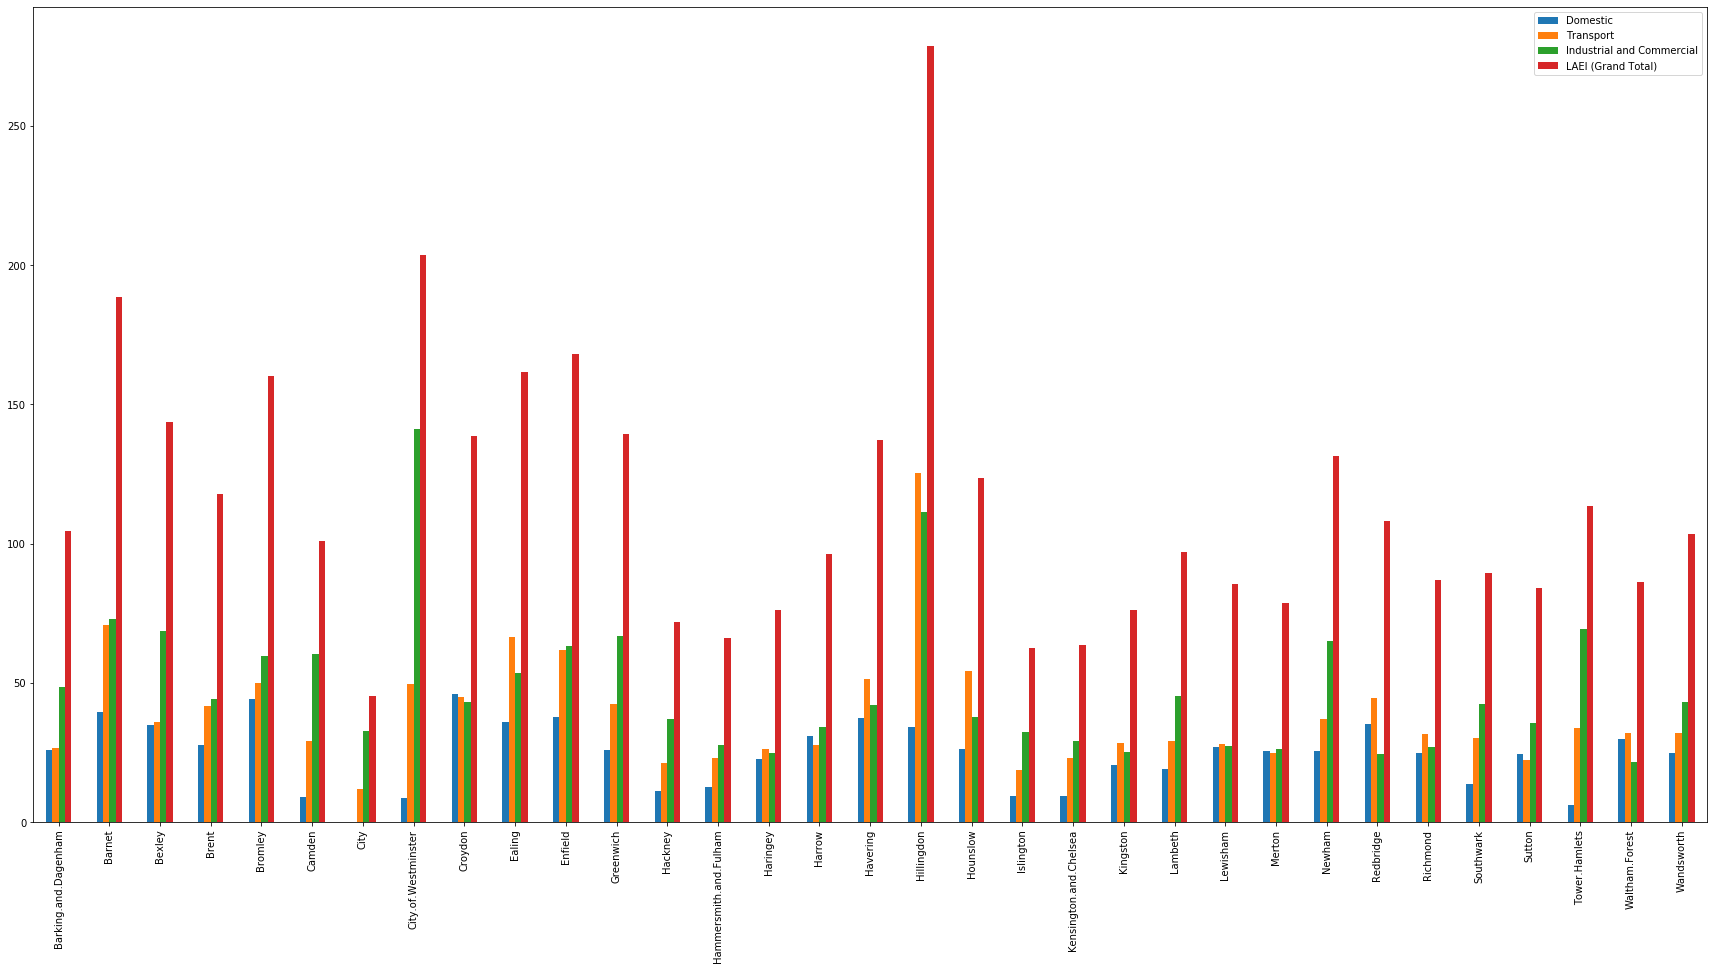

In [30]:
# 'Source','Domestic','Industrial and Commercial','Miscellaneous','Resuspension.1','Transport',

PM252016_df = PM252016_dat[:-1]
index = PM252016_df['Source'].values
df_temp = pd.DataFrame({'Domestic':PM252016_df['Domestic'].values,
                        'Transport':PM252016_df['Transport'].values,
                        'Industrial and Commercial':PM252016_df['Industrial and Commercial'].values,
#                         'Miscellaneous':PM252016_df['Miscellaneous'].values,
#                         'Resuspension.1':PM252016_df['Resuspension.1'].values,
                        'LAEI (Grand Total)':PM252016_df['LAEI (Grand Total)'].values
                       },
                       index=index)

ax =df_temp.plot.bar(figsize=(30,15))

## New dataset


In [35]:
# separate the independent and dependent variables
PM252016_dat = pd.read_csv('LSOAEmissionfile.csv')
PM252016_dat

,Unnamed: 0,LSOA11CD,LSOA11NM,Hectares,TransEm,DomEm,TotEm
0,1,E01000001,City of London 001A,13.0,0.487630,0.002760,1.865962
1,2,E01000002,City of London 001B,22.8,0.855228,0.004841,3.272610
2,3,E01000003,City of London 001C,5.9,0.221309,0.001253,0.846860
3,4,E01000005,City of London 001E,19.0,0.712690,0.004035,2.727175
4,5,E01000006,Barking and Dagenham 016A,14.7,0.104153,0.101120,0.406311
...,...,...,...,...,...,...,...
4830,4831,E01033742,Greenwich 007F,12.6,0.106251,0.064755,0.347857
4831,4832,E01033743,Greenwich 002H,100.1,0.844108,0.514446,2.763530
4832,4833,E01033744,Greenwich 007G,14.7,0.123960,0.075548,0.405833
4833,4834,E01033745,Greenwich 002I,56.4,0.475601,0.289858,1.557074


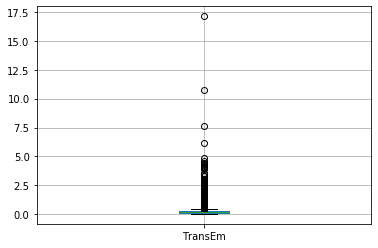

In [37]:
boxplot = PM252016_dat.boxplot(column=['TransEm'])

# [PM252016_dat[['TransEm']] <= 0.345].boxplot(column=['TransEm'])

#PM252016_dat[PM252016_dat[['TransEm']] <= 0.345]
#PM252016_dat = PM252016_dat[PM252016_dat[['TransEm']] <= 0.345]
#PM252016_dat = PM252016_dat[PM252016_dat[['DomEm']] <= 0.25]
#PM252016_dat = PM252016_dat[PM252016_dat[['TotEm']] <= 1.25]

#,'TransEm','DomEm'])1.25, 0.25
#PM252016_dat.describe()

In [38]:


predictors_PM252016_dat = PM252016_dat.drop(columns=['Unnamed: 0','LSOA11CD','LSOA11NM','Hectares','TotEm'], axis=1)
response_PM252016_dat = PM252016_dat[['TotEm']]

X = predictors_PM252016_dat.values
y = response_PM252016_dat.values

# the name list of independent variables
list_var_X = predictors_PM252016_dat.columns.tolist()
# list_var_X.remove('MEDV')

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_coordinates = pca.fit_transform(X)
print(list_var_X)

['TransEm', 'DomEm']


In [39]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp
print(pca.explained_variance_ratio_)
print(pca)

[0.921001 0.078999]
PCA(copy=True, iterated_power='auto', n_components=None, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)


In [40]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

,TransEm,DomEm
0,0.707107,0.707107
1,0.707107,-0.707107


In [41]:
print(pca.explained_variance_ratio_)

[0.921001 0.078999]


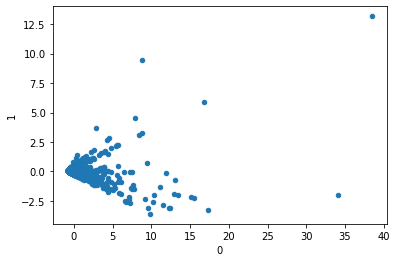

In [42]:
df_X_new_coord = pd.DataFrame(X_new_coordinates)
# print(df_X_new_coord.shape)
# print(df_X_new_coord.columns.tolist())
df_X_new_coord.plot.scatter(x = 0, y = 1)
# df_X_new_coord

## Linear Regresion

In [44]:
from sklearn.model_selection import train_test_split
split_rand_state = 1
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=split_rand_state)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=train_X, y=train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lr.score(X=test_X, y=test_y)

0.9284771190123918

In [49]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_PM252016_dat, y=response_PM252016_dat)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Add  TransEm                        with p-value 0.0
Add  DomEm                          with p-value 7.99291e-47
The predictors that are selected by stepwise regression are:
['TransEm', 'DomEm']


## PCA Linear Regression

In [50]:
# create a new X dataset including three PCs
X_three_pc = X_new_coordinates[:,[0,1]]

# split the traing and testing dataset
split_rand_state = 1
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_three_pc, y, random_state=split_rand_state)

# train a new model
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.9284771190123918

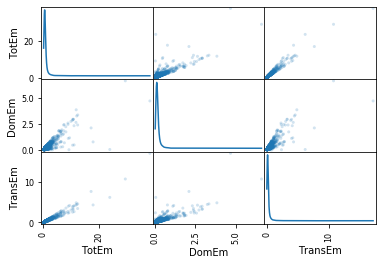

In [51]:
output = pd.plotting.scatter_matrix(PM252016_dat[['TotEm','DomEm','TransEm']], alpha=0.2, diagonal='kde')

In [52]:
pm25em = pd.read_csv('LSOAEmissionfile.csv')
pm25em.describe()
pm25em

,Unnamed: 0,LSOA11CD,LSOA11NM,Hectares,TransEm,DomEm,TotEm
0,1,E01000001,City of London 001A,13.0,0.487630,0.002760,1.865962
1,2,E01000002,City of London 001B,22.8,0.855228,0.004841,3.272610
2,3,E01000003,City of London 001C,5.9,0.221309,0.001253,0.846860
3,4,E01000005,City of London 001E,19.0,0.712690,0.004035,2.727175
4,5,E01000006,Barking and Dagenham 016A,14.7,0.104153,0.101120,0.406311
...,...,...,...,...,...,...,...
4830,4831,E01033742,Greenwich 007F,12.6,0.106251,0.064755,0.347857
4831,4832,E01033743,Greenwich 002H,100.1,0.844108,0.514446,2.763530
4832,4833,E01033744,Greenwich 007G,14.7,0.123960,0.075548,0.405833
4833,4834,E01033745,Greenwich 002I,56.4,0.475601,0.289858,1.557074


In [53]:
predictors_dat = pm25em.drop(columns=['Unnamed: 0','LSOA11CD','LSOA11NM','Hectares','TotEm','DomEm'], axis=1)
response_dat = pm25em[['TotEm']]

X = predictors_dat.values
y = response_dat.values

split_rand_state = 1
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=split_rand_state)
lr = LinearRegression()
lr.fit(X=train_X, y=train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lr.score(X=test_X, y=test_y)

0.9326565112154037

In [64]:
fig = px.box( pm25em[pm25em['TransEm'] <= 0.447], y="TransEm",points="all")
fig.show()

In [67]:
fig = px.box( pm25em[pm25em['TotEm'] <= 1.31], y="TotEm",points="all")
fig.show()

In [69]:
fig = px.box( pm25em[pm25em['DomEm'] <= 0.305], y="DomEm",points="all")
fig.show()